In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms


import numpy as np
import matplotlib.pyplot as plt


import time

### Dataset Loading and Transformation

In [2]:


# Transforms defined for the train, validation, and test datasets
train_transform = transforms.Compose([transforms.Resize((256,256)),
                                     transforms.ToTensor()])

val_transform = transforms.Compose([transforms.Resize((256,256)),
                                   transforms.ToTensor()])



In [3]:
dir = '../Label_Data_TrainTest/'
train_dir, val_dir  = dir+'train', dir+'val',
batch_size = 32
num_workers = 2

# Datasets extracted from their respective directories and some transformation applied to them
train_set = datasets.ImageFolder(train_dir, transform = train_transform)
val_set = datasets.ImageFolder(val_dir, transform = val_transform)



# Datasets loaded onto iterable object in form of batches 
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle=True, num_workers=num_workers)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = batch_size, shuffle=True, num_workers=num_workers)



### Loading the pretrained resnet152() model

In [4]:
from torchvision import models
classifier = models.resnet152(pretrained=True)


# Modify the last fully connected layer in the model
features= classifier.fc.in_features
classifier.fc = nn.Linear(features, len(train_set.classes))

# Use GPU computation if available
# device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

device = torch.device('cuda:0')
classifier.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Training the Network

In [5]:
learning_rate = 1.0e-5
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)


In [6]:

iterations = 1200
loss_train_list = list()
train_accuracy_list = list()

start = time.time()

for i in range(1,iterations+1):
    classifier.train()
    
    images_train, labels_train = iter(train_loader).next()
    images_train, labels_train = images_train.to(device), labels_train.to(device)
    
    optimizer.zero_grad()
    
    output_train = classifier.forward(images_train)
    loss_train = criterion(output_train, labels_train)
    prediction_train = output_train.max(dim=1)[1]

    counter_train = (labels_train == prediction_train).sum().item()
    loss_train_list.append(loss_train)
    train_accuracy_list.append(counter_train/len(output_train))
   
    if i%10 == 0:
        print("Iteration number: {}/{}".format(i, iterations))
        print('Training Accuracy: {:.3f}%'.format(counter_train/len(output_train) * 100))
        time_taken = time.time() - start
        print('Time elapsed: {:.0f}h {:.0f}m {:.0f}s'.format(time_taken//3600, (time_taken%3600)//60, (time_taken%3600)%60))
        print('='*70)
    loss_train.backward()
    optimizer.step()
    

print('Training Finished!')
print('Time elapsed: {:.0f}h {:.0f}m {:.0f}s'.format(time_taken//3600, (time_taken%3600)//60, (time_taken%3600)%60))


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 10/1200
Training Accuracy: 15.625%
Time elapsed: 0h 0m 15s
Iteration number: 20/1200
Training Accuracy: 15.625%
Time elapsed: 0h 0m 30s
Iteration number: 30/1200
Training Accuracy: 34.375%
Time elapsed: 0h 0m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 40/1200
Training Accuracy: 43.750%
Time elapsed: 0h 0m 60s
Iteration number: 50/1200
Training Accuracy: 50.000%
Time elapsed: 0h 1m 14s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 60/1200
Training Accuracy: 56.250%
Time elapsed: 0h 1m 29s
Iteration number: 70/1200
Training Accuracy: 75.000%
Time elapsed: 0h 1m 44s
Iteration number: 80/1200
Training Accuracy: 84.375%
Time elapsed: 0h 1m 60s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 90/1200
Training Accuracy: 71.875%
Time elapsed: 0h 2m 15s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 100/1200
Training Accuracy: 75.000%
Time elapsed: 0h 2m 31s
Iteration number: 110/1200
Training Accuracy: 75.000%
Time elapsed: 0h 2m 48s
Iteration number: 120/1200
Training Accuracy: 93.750%
Time elapsed: 0h 3m 3s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 130/1200
Training Accuracy: 90.625%
Time elapsed: 0h 3m 18s


Traceback (most recent call last):
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/shutil.py", line 490, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/shutil.py", line 488, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-uk3cg9or'


Iteration number: 140/1200
Training Accuracy: 90.625%
Time elapsed: 0h 3m 32s
Iteration number: 150/1200
Training Accuracy: 96.875%
Time elapsed: 0h 3m 47s
Iteration number: 160/1200
Training Accuracy: 87.500%
Time elapsed: 0h 4m 3s
Iteration number: 170/1200
Training Accuracy: 87.500%
Time elapsed: 0h 4m 18s
Iteration number: 180/1200
Training Accuracy: 90.625%
Time elapsed: 0h 4m 34s
Iteration number: 190/1200
Training Accuracy: 87.500%
Time elapsed: 0h 4m 48s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 200/1200
Training Accuracy: 75.000%
Time elapsed: 0h 5m 4s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 210/1200
Training Accuracy: 100.000%
Time elapsed: 0h 5m 19s
Iteration number: 220/1200
Training Accuracy: 93.750%
Time elapsed: 0h 5m 34s
Iteration number: 230/1200
Training Accuracy: 84.375%
Time elapsed: 0h 5m 49s
Iteration number: 240/1200
Training Accuracy: 96.875%
Time elapsed: 0h 6m 4s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 250/1200
Training Accuracy: 93.750%
Time elapsed: 0h 6m 19s
Iteration number: 260/1200
Training Accuracy: 96.875%
Time elapsed: 0h 6m 34s
Iteration number: 270/1200
Training Accuracy: 96.875%
Time elapsed: 0h 6m 49s
Iteration number: 280/1200
Training Accuracy: 96.875%
Time elapsed: 0h 7m 5s
Iteration number: 290/1200
Training Accuracy: 90.625%
Time elapsed: 0h 7m 20s
Iteration number: 300/1200
Training Accuracy: 100.000%
Time elapsed: 0h 7m 34s
Iteration number: 310/1200
Training Accuracy: 100.000%
Time elapsed: 0h 7m 50s
Iteration number: 320/1200
Training Accuracy: 96.875%
Time elapsed: 0h 8m 5s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 330/1200
Training Accuracy: 96.875%
Time elapsed: 0h 8m 20s
Iteration number: 340/1200
Training Accuracy: 100.000%
Time elapsed: 0h 8m 35s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 350/1200
Training Accuracy: 100.000%
Time elapsed: 0h 8m 50s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 360/1200
Training Accuracy: 100.000%
Time elapsed: 0h 9m 6s
Iteration number: 370/1200
Training Accuracy: 96.875%
Time elapsed: 0h 9m 22s
Iteration number: 380/1200
Training Accuracy: 93.750%
Time elapsed: 0h 9m 38s
Iteration number: 390/1200
Training Accuracy: 100.000%
Time elapsed: 0h 9m 53s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 400/1200
Training Accuracy: 100.000%
Time elapsed: 0h 10m 7s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 410/1200
Training Accuracy: 100.000%
Time elapsed: 0h 10m 22s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 420/1200
Training Accuracy: 100.000%
Time elapsed: 0h 10m 37s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 430/1200
Training Accuracy: 100.000%
Time elapsed: 0h 10m 53s
Iteration number: 440/1200
Training Accuracy: 96.875%
Time elapsed: 0h 11m 8s
Iteration number: 450/1200
Training Accuracy: 90.625%
Time elapsed: 0h 11m 25s
Iteration number: 460/1200
Training Accuracy: 100.000%
Time elapsed: 0h 11m 40s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 470/1200
Training Accuracy: 100.000%
Time elapsed: 0h 11m 55s
Iteration number: 480/1200
Training Accuracy: 100.000%
Time elapsed: 0h 12m 10s
Iteration number: 490/1200
Training Accuracy: 100.000%
Time elapsed: 0h 12m 26s
Iteration number: 500/1200
Training Accuracy: 100.000%
Time elapsed: 0h 12m 42s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 510/1200
Training Accuracy: 100.000%
Time elapsed: 0h 12m 57s
Iteration number: 520/1200
Training Accuracy: 100.000%
Time elapsed: 0h 13m 11s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 530/1200
Training Accuracy: 100.000%
Time elapsed: 0h 13m 26s
Iteration number: 540/1200
Training Accuracy: 100.000%
Time elapsed: 0h 13m 41s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 550/1200
Training Accuracy: 100.000%
Time elapsed: 0h 13m 55s
Iteration number: 560/1200
Training Accuracy: 100.000%
Time elapsed: 0h 14m 10s
Iteration number: 570/1200
Training Accuracy: 100.000%
Time elapsed: 0h 14m 25s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 580/1200
Training Accuracy: 100.000%
Time elapsed: 0h 14m 40s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 590/1200
Training Accuracy: 100.000%
Time elapsed: 0h 14m 54s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 600/1200
Training Accuracy: 100.000%
Time elapsed: 0h 15m 9s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 610/1200
Training Accuracy: 100.000%
Time elapsed: 0h 15m 25s
Iteration number: 620/1200
Training Accuracy: 100.000%
Time elapsed: 0h 15m 40s
Iteration number: 630/1200
Training Accuracy: 100.000%
Time elapsed: 0h 15m 55s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 640/1200
Training Accuracy: 100.000%
Time elapsed: 0h 16m 10s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 650/1200
Training Accuracy: 100.000%
Time elapsed: 0h 16m 26s
Iteration number: 660/1200
Training Accuracy: 100.000%
Time elapsed: 0h 16m 42s
Iteration number: 670/1200
Training Accuracy: 100.000%
Time elapsed: 0h 16m 58s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 680/1200
Training Accuracy: 100.000%
Time elapsed: 0h 17m 14s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 690/1200
Training Accuracy: 96.875%
Time elapsed: 0h 17m 29s
Iteration number: 700/1200
Training Accuracy: 100.000%
Time elapsed: 0h 17m 44s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 710/1200
Training Accuracy: 100.000%
Time elapsed: 0h 17m 60s
Iteration number: 720/1200
Training Accuracy: 100.000%
Time elapsed: 0h 18m 14s
Iteration number: 730/1200
Training Accuracy: 100.000%
Time elapsed: 0h 18m 29s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 740/1200
Training Accuracy: 100.000%
Time elapsed: 0h 18m 45s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 750/1200
Training Accuracy: 100.000%
Time elapsed: 0h 19m 1s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 760/1200
Training Accuracy: 100.000%
Time elapsed: 0h 19m 17s
Iteration number: 770/1200
Training Accuracy: 100.000%
Time elapsed: 0h 19m 32s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 780/1200
Training Accuracy: 100.000%
Time elapsed: 0h 19m 47s
Iteration number: 790/1200
Training Accuracy: 100.000%
Time elapsed: 0h 20m 2s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 800/1200
Training Accuracy: 100.000%
Time elapsed: 0h 20m 18s
Iteration number: 810/1200
Training Accuracy: 100.000%
Time elapsed: 0h 20m 34s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 820/1200
Training Accuracy: 100.000%
Time elapsed: 0h 20m 50s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 830/1200
Training Accuracy: 100.000%
Time elapsed: 0h 21m 5s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 840/1200
Training Accuracy: 100.000%
Time elapsed: 0h 21m 20s
Iteration number: 850/1200
Training Accuracy: 100.000%
Time elapsed: 0h 21m 35s
Iteration number: 860/1200
Training Accuracy: 100.000%
Time elapsed: 0h 21m 51s
Iteration number: 870/1200
Training Accuracy: 100.000%
Time elapsed: 0h 22m 6s
Iteration number: 880/1200
Training Accuracy: 100.000%
Time elapsed: 0h 22m 21s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 890/1200
Training Accuracy: 100.000%
Time elapsed: 0h 22m 38s
Iteration number: 900/1200
Training Accuracy: 100.000%
Time elapsed: 0h 22m 53s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 910/1200
Training Accuracy: 100.000%
Time elapsed: 0h 23m 8s


Traceback (most recent call last):
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/multiprocessing/util.py", line 262, in _run_finalizers
    finalizer()
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/shutil.py", line 490, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/robotics/anaconda3/envs/estif/lib/python3.6/shutil.py", line 488, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_l66mvaf'


Iteration number: 920/1200
Training Accuracy: 100.000%
Time elapsed: 0h 23m 23s
Iteration number: 930/1200
Training Accuracy: 96.875%
Time elapsed: 0h 23m 38s
Iteration number: 940/1200
Training Accuracy: 100.000%
Time elapsed: 0h 23m 53s
Iteration number: 950/1200
Training Accuracy: 100.000%
Time elapsed: 0h 24m 9s
Iteration number: 960/1200
Training Accuracy: 100.000%
Time elapsed: 0h 24m 25s
Iteration number: 970/1200
Training Accuracy: 100.000%
Time elapsed: 0h 24m 42s
Iteration number: 980/1200
Training Accuracy: 100.000%
Time elapsed: 0h 24m 57s
Iteration number: 990/1200
Training Accuracy: 100.000%
Time elapsed: 0h 25m 13s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1000/1200
Training Accuracy: 100.000%
Time elapsed: 0h 25m 27s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1010/1200
Training Accuracy: 100.000%
Time elapsed: 0h 25m 42s
Iteration number: 1020/1200
Training Accuracy: 100.000%
Time elapsed: 0h 25m 57s
Iteration number: 1030/1200
Training Accuracy: 100.000%
Time elapsed: 0h 26m 13s
Iteration number: 1040/1200
Training Accuracy: 100.000%
Time elapsed: 0h 26m 28s
Iteration number: 1050/1200
Training Accuracy: 100.000%
Time elapsed: 0h 26m 45s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1060/1200
Training Accuracy: 100.000%
Time elapsed: 0h 26m 60s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1070/1200
Training Accuracy: 100.000%
Time elapsed: 0h 27m 15s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1080/1200
Training Accuracy: 100.000%
Time elapsed: 0h 27m 31s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1090/1200
Training Accuracy: 100.000%
Time elapsed: 0h 27m 45s
Iteration number: 1100/1200
Training Accuracy: 100.000%
Time elapsed: 0h 28m 1s
Iteration number: 1110/1200
Training Accuracy: 100.000%
Time elapsed: 0h 28m 16s


/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "
/home/robotics/anaconda3/envs/estif/lib/python3.6/site-packages/PIL/JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


Iteration number: 1120/1200
Training Accuracy: 100.000%
Time elapsed: 0h 28m 31s
Iteration number: 1130/1200
Training Accuracy: 100.000%
Time elapsed: 0h 28m 47s
Iteration number: 1140/1200
Training Accuracy: 100.000%
Time elapsed: 0h 29m 2s
Iteration number: 1150/1200
Training Accuracy: 100.000%
Time elapsed: 0h 29m 17s
Iteration number: 1160/1200
Training Accuracy: 100.000%
Time elapsed: 0h 29m 32s
Iteration number: 1170/1200
Training Accuracy: 100.000%
Time elapsed: 0h 29m 48s
Iteration number: 1180/1200
Training Accuracy: 100.000%
Time elapsed: 0h 30m 3s
Iteration number: 1190/1200
Training Accuracy: 100.000%
Time elapsed: 0h 30m 18s
Iteration number: 1200/1200
Training Accuracy: 100.000%
Time elapsed: 0h 30m 33s
Training Finished!
Time elapsed: 0h 30m 33s


<Figure size 432x288 with 0 Axes>

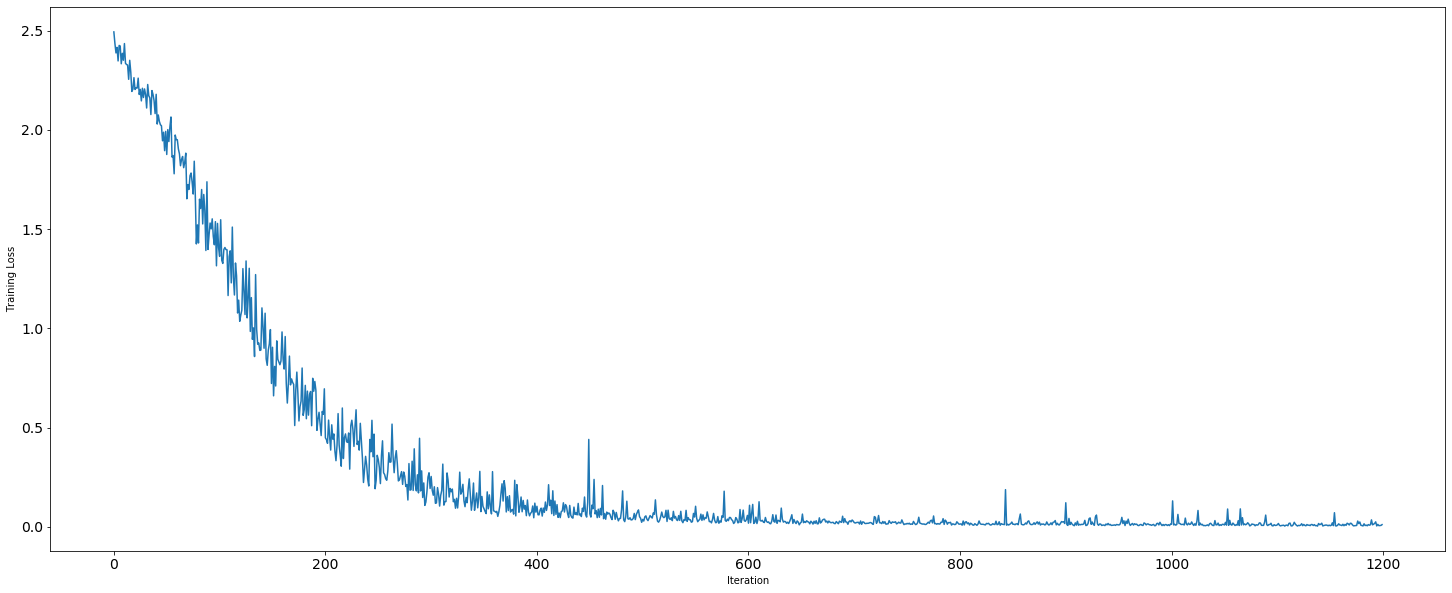

<Figure size 432x288 with 0 Axes>

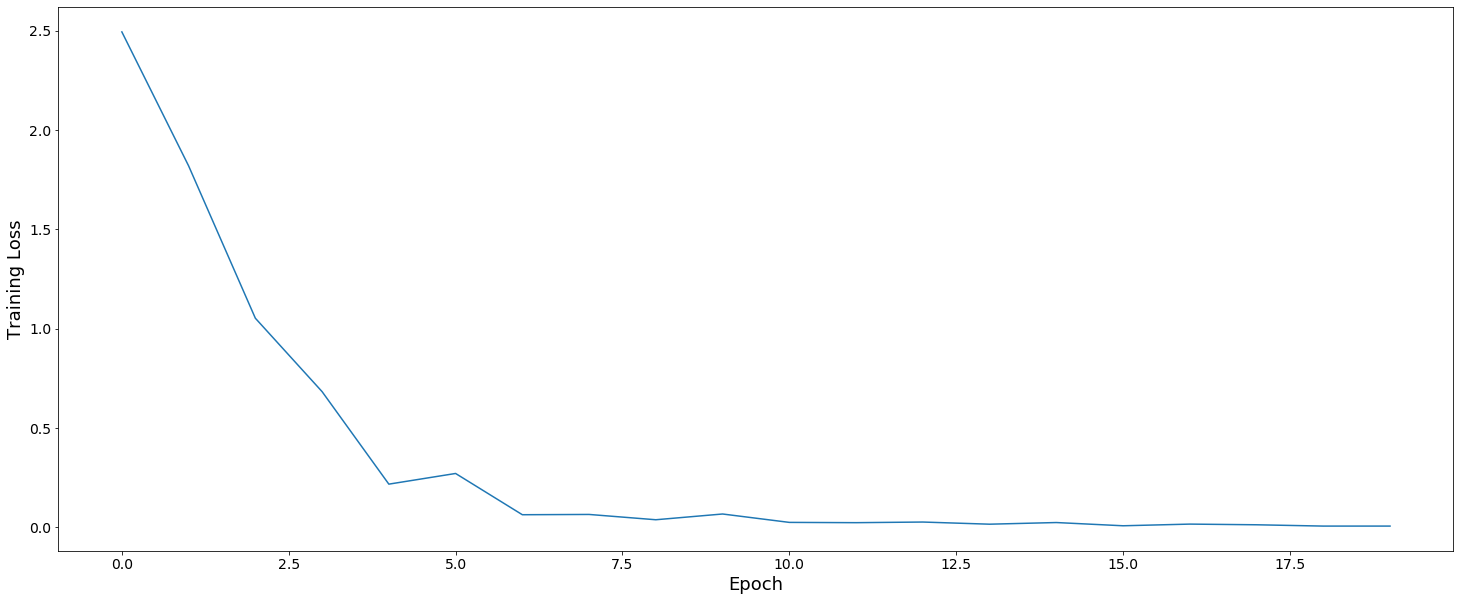

<Figure size 432x288 with 0 Axes>

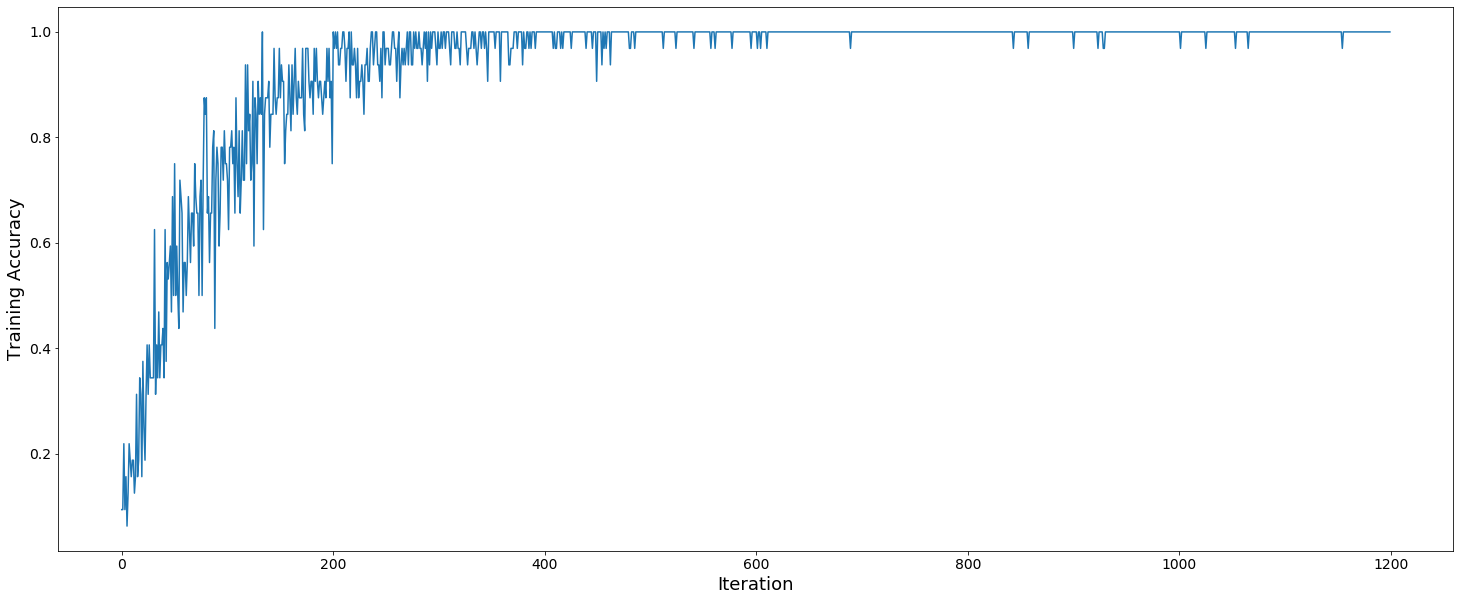

In [7]:
# Loss at the end of every Iteration

plt.figure(1)
plt.figure(figsize = (25,10))
plt.plot(np.array(loss_train_list), '-')
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.rc('axes', labelsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# Loss at the end of every epoch

LossPerEpoch = []
for x in range(0, len(loss_train_list) +1, len(train_loader)):
    LossPerEpoch.append(loss_train_list[x])
    
plt.figure(2)
plt.figure(figsize = (25,10))
plt.plot(np.array(LossPerEpoch), '-')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.rc('axes', labelsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(3)
plt.figure(figsize = (25,10))
plt.plot(np.array(train_accuracy_list), '-')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.rc('axes', labelsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Save the finetuned model

In [8]:
print("Our Model: \n\n", classifier, '\n')
print("The state dict keys: \n\n", classifier.state_dict().keys())

Our Model: 

 ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1

In [9]:
# saving the model as a checkpoint file
torch.save(classifier.state_dict(), 'resnet152_4000Iterations.pth')